### Package 설치

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=8dec63d015ecd55317d7213634f30221b005f51c40bc43150feca908581d90fc
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler

데이터 생성

In [2]:
x1 = [95, 91, 66, 94, 68, 63, 12, 73, 93, 51, 13, 70, 63, 63, 97, 56, 67, 96, 75, 6]
x2 = [56, 27, 25, 1, 9, 80, 92, 69, 6, 25, 83, 82, 54, 97, 66, 93, 76, 59, 94, 9]
x3 = [57, 34, 9, 79, 4, 77, 100, 42, 6, 96, 61, 66, 9, 25, 84, 46, 16, 63, 53, 30]

In [3]:
X = np.stack((x1,x2,x3),axis=0)
print('X shape', X.shape)

X shape (3, 20)


In [4]:
X = pd.DataFrame(X.T,columns=['x1','x2','x3'])
print(X)

    x1  x2   x3
0   95  56   57
1   91  27   34
2   66  25    9
3   94   1   79
4   68   9    4
5   63  80   77
6   12  92  100
7   73  69   42
8   93   6    6
9   51  25   96
10  13  83   61
11  70  82   66
12  63  54    9
13  63  97   25
14  97  66   84
15  56  93   46
16  67  76   16
17  96  59   63
18  75  94   53
19   6   9   30


### PCA의 순서
1. 데이터 정규화
2. 공분산(상관) 행렬 계산
3. 공분산(상관) 행렬에서 고유 분해를 수행하여 고유 벡터(주성분) 및 고유값을 계산
4. 고유값을 기준으로 고유 벡터를 높은 순으로 정렬
5. 각 고유 벡터에 대해 설명된 분산을 계산
6. 원하는 주성분 수만큼 표준화된 데이터를 축소
7. 사용된 주성분을 기반으로 설명된 분산을 결정

In [5]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [12]:
features = X_std.T
features

array([[ 1.08573604,  0.93801686,  0.01477192,  1.04880625,  0.08863151,
        -0.09601747, -1.97943714,  0.2732805 ,  1.01187645, -0.53917504,
        -1.94250735,  0.16249111, -0.09601747, -0.09601747,  1.15959564,
        -0.35452606,  0.05170172,  1.12266584,  0.3471401 , -2.20101593],
       [ 0.02614175, -0.86575334, -0.92726334, -1.66538341, -1.41934339,
         0.76426183,  1.13332186,  0.42595679, -1.5116084 , -0.92726334,
         0.85652683,  0.82577183, -0.03536825,  1.28709688,  0.33369178,
         1.16407687,  0.64124181,  0.11840676,  1.19483187, -1.41934339],
       [ 0.30684189, -0.46445467, -1.30282049,  1.04460382, -1.47049366,
         0.97753455,  1.74883111, -0.1961776 , -1.40342439,  1.61469258,
         0.44098042,  0.60865359, -1.30282049, -0.76626636,  1.21227698,
        -0.06203907, -1.06807806,  0.50804969,  0.17270336, -0.5985932 ]])

In [46]:
cov_matrix = np.cov(features,ddof=0)
cov_matrix

array([[ 1.        , -0.19352488, -0.11475266],
       [-0.19352488,  1.        ,  0.2969511 ],
       [-0.11475266,  0.2969511 ,  1.        ]])

In [47]:
#Eigenvalue Decomposition
eigen_decomp = lin.eig(cov_matrix)
eigenvalues = eigen_decomp[0]
eigenvectors = eigen_decomp[1]
print('eigen val', eigenvalues)
print('eigen vec', eigenvectors)

eigen val [1.41318354 0.89713637 0.68968009]
eigen vec [[ 0.47018528 -0.85137353 -0.23257022]
 [-0.64960236 -0.15545725 -0.74421087]
 [-0.59744671 -0.50099516  0.62614797]]


In [48]:
mat = np.zeros((3,3))
mat[0][0] = eigenvalues[0]
mat[1][1] = eigenvalues[1]
mat[2][2] = eigenvalues[2]
mat

array([[1.41318354, 0.        , 0.        ],
       [0.        , 0.89713637, 0.        ],
       [0.        , 0.        , 0.68968009]])

In [49]:
np.dot(np.dot(eigenvectors,mat),eigenvectors.T)

array([[ 1.        , -0.19352488, -0.11475266],
       [-0.19352488,  1.        ,  0.2969511 ],
       [-0.11475266,  0.2969511 ,  1.        ]])

In [50]:
#
cov_matrix

array([[ 1.        , -0.19352488, -0.11475266],
       [-0.19352488,  1.        ,  0.2969511 ],
       [-0.11475266,  0.2969511 ,  1.        ]])

In [51]:
def new_coordinates(X,eigenvectors):
    for i in range(eigenvectors.shape[0]):
        if i == 0:
            new = [X.dot(eigenvectors.T[i])]
        else:
            new = np.concatenate((new,[X.dot(eigenvectors.T[i])]),axis=0)
    return new.T
new_coordinates(X_std,eigenvectors)

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111],
       [-1.12563709, -0.52680338,  0.06564012],
       [-2.71174416,  0.63290138,  0.71195473],
       [-0.03100441, -0.20059783, -0.50339479],
       [ 2.29618509,  0.07661447,  0.01087174],
       [-0.61585248, -0.205764  ,  1.82651199],
       [-1.73320252,  1.29971699,  0.09045178],
       [-0.82366049, -0.57164535, -0.27123176],
       [ 0.75619512,  0.73995175, -0.76710616],
       [-0.42344386,  0.26555394, -1.41533681],
       [-0.39581307, -1.64646874,  0.24104031],
       [-0.88581498,  0.15195119, -0.82271209],
       [ 0.24587691,  0.39139878, -1.15801831],
       [ 0.14741103, -1.22874561, -0.03110396],
       [-0.7161265 , -0.56781471, -0.86180345],
       [ 0.24475107,  2.39442622,  1.19337361]])

In [56]:
def method_pca(X,number):
    # scaler = StandardScaler()
    x_std = scaler.fit_transform(X)
    features = x_std.T
    cov_matrix = np.cov(features,ddof=0) #공분산

    eigenvalues = lin.eig(cov_matrix)[0] #eigenvalue
    eigenvectors = lin.eig(cov_matrix)[1] #eigenvector

    new_coordinates(x_std,eigenvectors)

    new_coordinate = new_coordinates(x_std,eigenvectors)

    index = eigenvalues.argsort()
    index = list(index)

    for i in range(number):
        if i==0:
            new = [new_coordinate[:,index.index(i)]]
        else:
            new = np.concatenate(([new_coordinate[:,index.index(i)]],new),axis=0)
    return new.T

In [57]:
method_pca(X,3)

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111],
       [-1.12563709, -0.52680338,  0.06564012],
       [-2.71174416,  0.63290138,  0.71195473],
       [-0.03100441, -0.20059783, -0.50339479],
       [ 2.29618509,  0.07661447,  0.01087174],
       [-0.61585248, -0.205764  ,  1.82651199],
       [-1.73320252,  1.29971699,  0.09045178],
       [-0.82366049, -0.57164535, -0.27123176],
       [ 0.75619512,  0.73995175, -0.76710616],
       [-0.42344386,  0.26555394, -1.41533681],
       [-0.39581307, -1.64646874,  0.24104031],
       [-0.88581498,  0.15195119, -0.82271209],
       [ 0.24587691,  0.39139878, -1.15801831],
       [ 0.14741103, -1.22874561, -0.03110396],
       [-0.7161265 , -0.56781471, -0.86180345],
       [ 0.24475107,  2.39442622,  1.19337361]])

### Sklearn을 이용한 분석

In [72]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

pca = PCA(n_components=3)

In [55]:
print(pca.fit_transform(X_std))

[[-0.31019368 -1.08215716 -0.07983642]
 [-1.28092404 -0.43132556  0.13533091]
 [-1.38766381  0.78428014 -0.12911446]
 [-0.95087515 -1.15737142  1.6495519 ]
 [-1.84222365  0.88189889  0.11493111]
 [ 1.12563709 -0.52680338  0.06564012]
 [ 2.71174416  0.63290138  0.71195473]
 [ 0.03100441 -0.20059783 -0.50339479]
 [-2.29618509  0.07661447  0.01087174]
 [ 0.61585248 -0.205764    1.82651199]
 [ 1.73320252  1.29971699  0.09045178]
 [ 0.82366049 -0.57164535 -0.27123176]
 [-0.75619512  0.73995175 -0.76710616]
 [ 0.42344386  0.26555394 -1.41533681]
 [ 0.39581307 -1.64646874  0.24104031]
 [ 0.88581498  0.15195119 -0.82271209]
 [-0.24587691  0.39139878 -1.15801831]
 [-0.14741103 -1.22874561 -0.03110396]
 [ 0.7161265  -0.56781471 -0.86180345]
 [-0.24475107  2.39442622  1.19337361]]


### wine 데이터셋에 PCA를 적용해보자

In [ ]:


df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)
# df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3,
                     stratify=y,
                     random_state=0)

In [ ]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\n eigen value \n%s' % eigen_vals)


 eigen value 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


In [ ]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

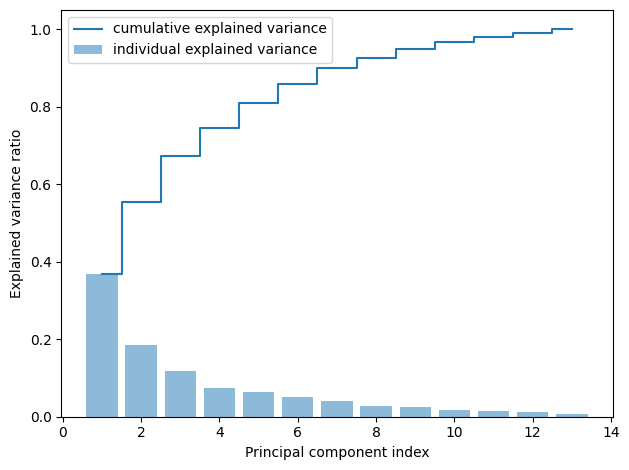

In [ ]:
import matplotlib.pyplot as plt


plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
# (고윳값, 고유벡터) 튜플의 리스트를 만듭니다
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# 높은 값에서 낮은 값으로 (고윳값, 고유벡터) 튜플을 정렬합니다
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [ ]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('투영 행렬 W:\n', w)

투영 행렬 W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [ ]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

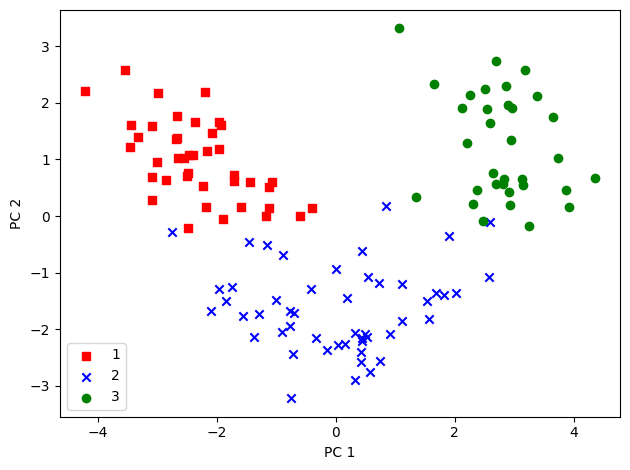

In [ ]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0],
                X_train_pca[y_train == l, 1],
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

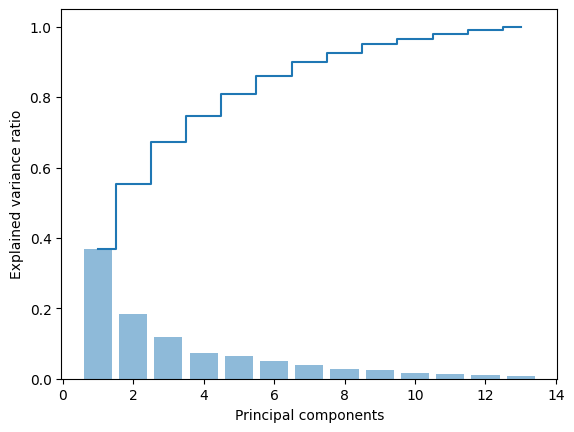

In [ ]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

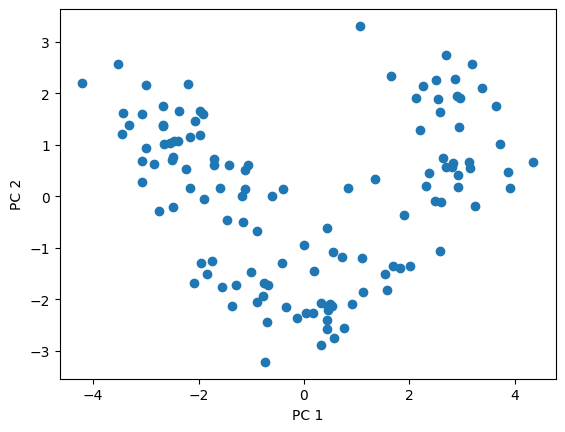

In [ ]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

### MNIST dataset

In [66]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D


In [67]:
mnist = fetch_openml('mnist_784', as_frame=False, cache=False)
X = mnist.data.astype('float32')
y = mnist.target.astype('int64').reshape(-1,1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [68]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [69]:
feat_cols = ['pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X, columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
df['y'] = y
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [73]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis=1), df['y'], stratify=df['y'])

In [74]:
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_scaled_train = standard_scaler.transform(X_train)
X_scaled_test  = standard_scaler.transform(X_test)

In [75]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(52500, 784)
(17500, 784)
(52500,)
(17500,)


In [76]:
print(pd.Series(y_train).value_counts()/len(y_train))
print(pd.Series(y_test).value_counts()/len(y_test))

1    0.112533
7    0.104190
3    0.102019
2    0.099848
9    0.099390
0    0.098610
6    0.098229
8    0.097505
4    0.097486
5    0.090190
Name: y, dtype: float64
1    0.112514
7    0.104171
3    0.102000
2    0.099886
9    0.099429
0    0.098629
6    0.098229
4    0.097486
8    0.097486
5    0.090171
Name: y, dtype: float64


In [77]:
pca = PCA()
pca.fit(X_scaled_train)

PCA()

In [78]:
variance_ratio = []
ratio = 0
for i in np.sort(pca.explained_variance_ratio_)[::-1]:
    ratio += i
    variance_ratio.append(ratio)

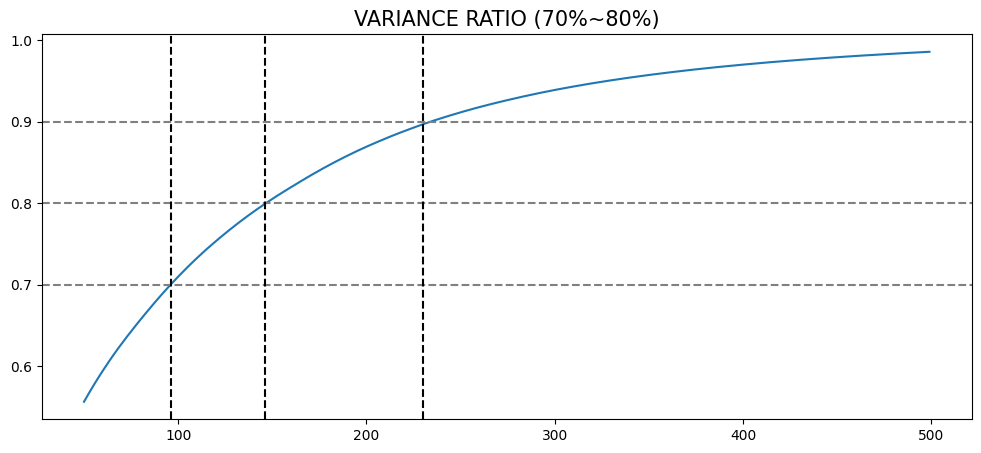

In [79]:
plt.figure(figsize=(12, 5))

plt.plot(list(range(50, 500)), variance_ratio[50:500])

plt.axhline(0.7, color='gray', ls='--')
plt.axhline(0.8, color='gray', ls='--')
plt.axhline(0.9, color='gray', ls='--')

plt.axvline(96, color='black', ls='--')
plt.axvline(146, color='black', ls='--')
plt.axvline(230, color='black', ls='--')

plt.title("VARIANCE RATIO (70%~80%)", size=15)
plt.show()

# scaling한 후
# 96개의 주성분을 선택하면 누적설명률이 70%정도
# 146개의 주성분을 선택하면 누적설명률이 80%정도
# 230개 이상의 주성분을 선택하면 누적설명률이 90%이상 된다.

## Scree Plot

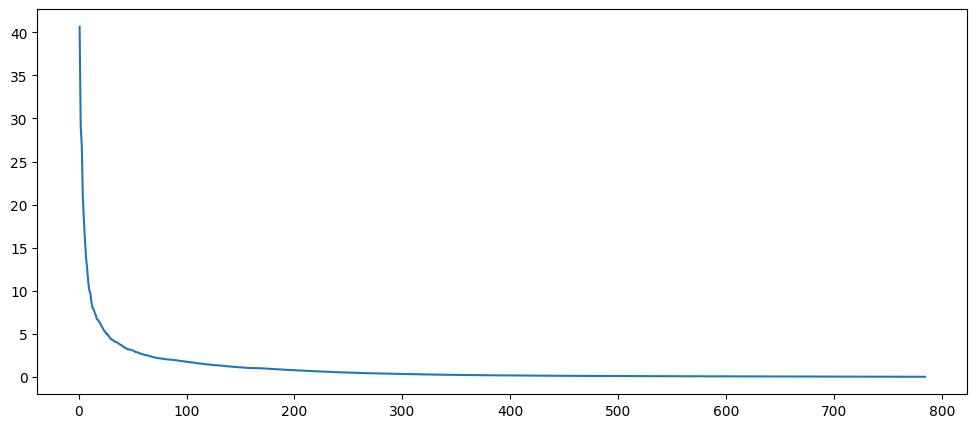

In [80]:
# eigen value를 내림차순으로 정렬한 뒤, plot을 그려보았다.
plt.figure(figsize=(12, 5))
plt.plot(range(1, X.shape[1]+1), np.sort(pca.explained_variance_)[::-1])
plt.show()

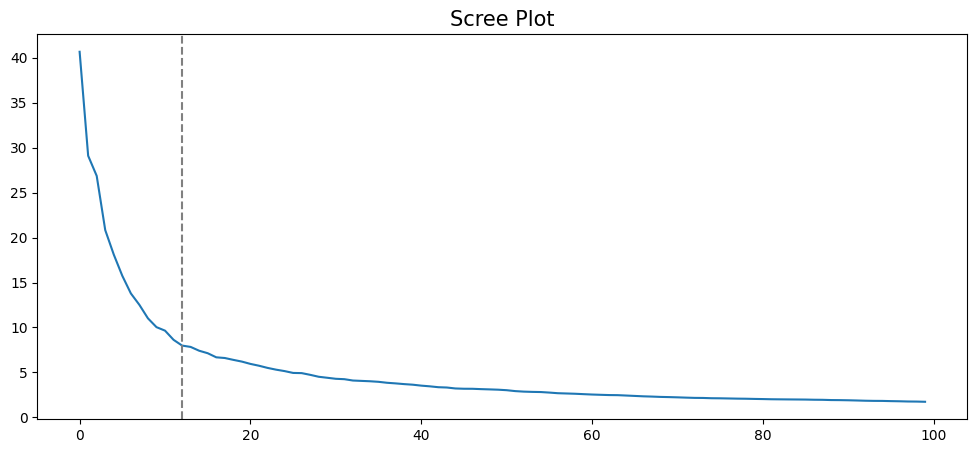

In [81]:
plt.figure(figsize=(12, 5))
plt.plot(range(0, 100), np.sort(pca.explained_variance_)[::-1][0:100])

plt.title('Scree Plot', size=15)
plt.axvline(12, ls='--', color='grey')

plt.show()

## Kaiser's Rule

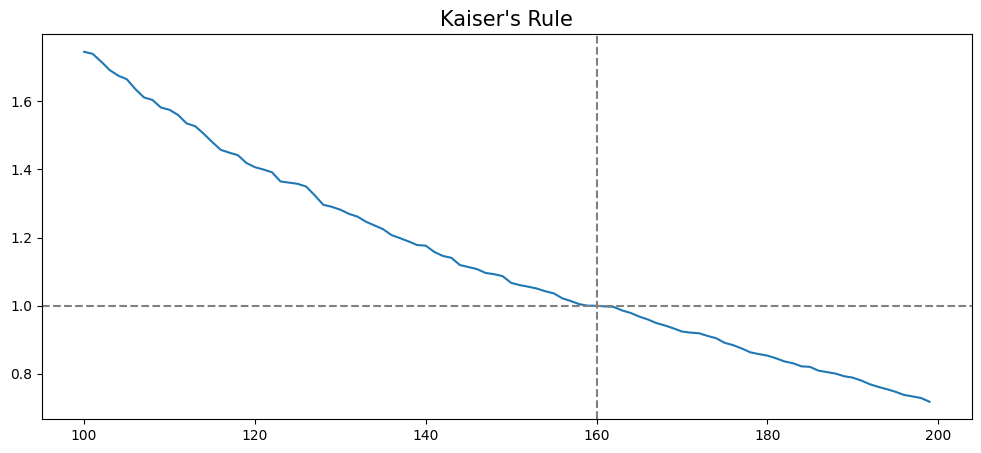

In [ ]:
# 이번에는 kaiser's rule에 따라 고유값 1 이상의 주성분을 찾아보고자 한다.
# 이를 위해 100~200 구간을 세밀하게 살펴보았으며,
# 그 결과 160개의 주성분을 사용했을 때 eigenvalue가 모두 1 이상이었다.
plt.figure(figsize=(12, 5))
plt.plot(range(100, 200), np.sort(pca.explained_variance_)[::-1][100:200])

plt.title("Kaiser's Rule", size=15)
plt.axhline(1, ls='--', color='grey')
plt.axvline(160, ls='--', color='grey')

plt.show()

In [ ]:
pca = PCA(n_components=160)
pca.fit(X_scaled_train)
X_PCA_train = pca.transform(X_scaled_train)
X_PCA_test  = pca.transform(X_scaled_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
import warnings
import time
warnings.filterwarnings('ignore')

In [ ]:
lr_clf = LogisticRegression()
start = time.time()
lr_clf.fit(X_train, y_train)
end  = time.time()
print(f'time > {end-start}')

time > 39.7683219909668


In [ ]:
pred = lr_clf.predict(X_test)
print(accuracy_score(pred, y_test))

0.9187428571428572


In [ ]:
start = time.time()
lr_clf.fit(X_PCA_train, y_train)
end  = time.time()
print(f'time > {end-start}')


time > 12.111595392227173


In [ ]:
pred = lr_clf.predict(X_PCA_test)
print(accuracy_score(pred, y_test))

0.9197714285714286


##Todo
위의 MNIST데이터에서 적용한 흐름을 앞에서 해보았던 wine 데이터셋에 적용해보자